_Lambda School Data Science — Tree Ensembles_ 

# Model Interpretation

### Objectives
- Partial Dependence Plots
- Shapley Values


### Pre-reads
1. Kaggle / Dan Becker: Machine Learning Explainability
  - https://www.kaggle.com/dansbecker/partial-plots
  - https://www.kaggle.com/dansbecker/shap-values
2. Christoph Molnar: Interpretable Machine Learning
  - https://christophm.github.io/interpretable-ml-book/pdp.html
  - https://christophm.github.io/interpretable-ml-book/shapley.html 


### Libraries
- [PDPbox](https://github.com/SauceCat/PDPbox): `pip install pdpbox`
- [shap](https://github.com/slundberg/shap): `conda install -c conda-forge shap` / `pip install shap`

  
### Types of explanations

#### Global explanation: all features in relation to each other
- Feature Importances (mean decrease impurity)
- Permutation Importances
- Drop-Column Importances

#### Global explanation: individual feature in relation to target
- Partial Dependence plots

#### Individual prediction explanation
- Shapley Values

_Note that the coefficients from a linear model give you all three types of explanations!_

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
!pip install pdpbox

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - pdpbox

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [29]:
# %cd PDPbox
# !python3 setup.py install
# %cd ..
# !pwd

running install
running bdist_egg
running egg_info
creating PDPbox.egg-info
writing PDPbox.egg-info/PKG-INFO
writing dependency_links to PDPbox.egg-info/dependency_links.txt
writing requirements to PDPbox.egg-info/requires.txt
writing top-level names to PDPbox.egg-info/top_level.txt
writing manifest file 'PDPbox.egg-info/SOURCES.txt'
reading manifest file 'PDPbox.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'PDPbox.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.9-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/pdpbox
copying pdpbox/get_dataset.py -> build/lib/pdpbox
copying pdpbox/pdp_plot_utils.py -> build/lib/pdpbox
copying pdpbox/pdp.py -> build/lib/pdpbox
copying pdpbox/_version.py -> build/lib/pdpbox
copying pdpbox/pdp_calc_utils.py -> build/lib/pdpbox
copying pdpbox/__init__.py -> build/lib/pdpbox
copying pdpbox/utils.py -> build/lib/pdpbox
copying pdpbox/info_plot_

In [32]:
!conda list

# packages in environment at /Library/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_r-mutex                  1.0.0               anacondar_1  
alabaster                 0.7.12                   py37_0  
anaconda                  2018.12                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.2                    py37_0  
anyqt                     0.0.10                   py37_0  
appnope                   0.1.0                    py37_0  
appscript                 1.0.1            py37h1de35cc_1  
asn1crypto                0.24.0                   py37_0  
astroid                   2.1.0                    py37_0  
astropy                   3.1              py37h1de35cc_0  
atomicwrites              1.2.1                    py37_0  
attrs                     18.2.0          

In [33]:
!pip list

Package             Version   
------------------- ----------
altair              3.0.0rc1  
appnope             0.1.0     
arrow               0.13.1    
astropy             3.1.2     
attrs               19.1.0    
autopep8            1.4.4     
backcall            0.1.0     
beautifulsoup4      4.7.1     
bokeh               1.1.0     
category-encoders   1.3.0     
certifi             2019.3.9  
chardet             3.0.4     
Click               7.0       
colour              0.1.5     
cycler              0.10.0    
decorator           4.4.0     
dnspython           1.16.0    
dtreeviz            0.3.3     
eli5                0.8.2     
entrypoints         0.3       
et-xmlfile          1.0.1     
fast-histogram      0.7       
Flask               1.0.2     
geos                0.2.1     
google              2.0.2     
graphviz            0.10.1    
idna                2.8       
imageio             2.5.0     
ipython             7.4.0     
ipython-genutils    0.2.0     
itsdange

In [36]:
import sys; sys.path

['/Users/wel51x/Downloads',
 '/Library/anaconda3/lib/python37.zip',
 '/Library/anaconda3/lib/python3.7',
 '/Library/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Library/anaconda3/lib/python3.7/site-packages',
 '/Library/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Library/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/wel51x/.ipython',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages']

In [35]:
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

In [38]:
!env | sort

AR=/Library/anaconda3/bin/x86_64-apple-darwin13.4.0-ar
AS=/Library/anaconda3/bin/x86_64-apple-darwin13.4.0-as
Apple_PubSub_Socket_Render=/private/tmp/com.apple.launchd.bOaurvT1un/Render
CC=x86_64-apple-darwin13.4.0-clang
CFLAGS=-march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe
CHECKSYMS=/Library/anaconda3/bin/x86_64-apple-darwin13.4.0-checksyms
CLANG=/Library/anaconda3/bin/x86_64-apple-darwin13.4.0-clang
CLANGXX=/Library/anaconda3/bin/x86_64-apple-darwin13.4.0-clang++
CLICOLOR=1
CODESIGN_ALLOCATE=/Library/anaconda3/bin/x86_64-apple-darwin13.4.0-codesign_allocate
CONDA_BACKUP_HOST=x86_64-apple-darwin13.4.0
CONDA_BUILD_SYSROOT=/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX10.14.sdk
CONDA_DEFAULT_ENV=base
CONDA_EXE=/Library/anaconda3/bin/conda
CONDA_PREFIX=/Library/anaconda3
CONDA_PROMPT_MODIFIER=(base) 
CONDA_PYTHON_EXE=/Library/anaconda3/bin/python
CONDA_SHLVL=1
CPPFLAGS=-D_FORTIFY_SOURCE=2 -mm

In [1]:
!conda install -c conda-forge shap

Solving environment: done

# All requested packages already installed.



From [PDPbox documentation](https://pdpbox.readthedocs.io/en/latest/):


>**The common headache**: When using black box machine learning algorithms like random forest and boosting, it is hard to understand the relations between predictors and model outcome. For example, in terms of random forest, all we get is the feature importance. Although we can know which feature is significantly influencing the outcome based on the importance calculation, it really sucks that we don’t know in which direction it is influencing. And in most of the real cases, the effect is non-monotonic. We need some powerful tools to help understanding the complex relations between predictors and model prediction.

[Animation by Christoph Molnar](https://twitter.com/ChristophMolnar/status/1066398522608635904), author of [_Interpretable Machine Learning_](https://christophm.github.io/interpretable-ml-book/)

> Partial dependence plots show how a feature affects predictions of a Machine Learning model on average.
> 1. Define grid along feature
> 2. Model predictions at grid points
> 3. Line per data instance -> ICE (Individual Conditional Expectation) curve
> 4. Average curves to get a PDP (Partial Dependence Plot)

# Lending Club

In [28]:
import category_encoders as ce
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Load data from https://www.kaggle.com/c/ds1-tree-ensembles/data
X_train = pd.read_csv('/Users/wel51x/Downloads/ds2-tree-ensembles/train_features.csv')
X_test = pd.read_csv('/Users/wel51x/Downloads/ds2-tree-ensembles/test_features.csv')
y_train = pd.read_csv('/Users/wel51x/Downloads/ds2-tree-ensembles/train_labels.csv')['charged_off']
sample_submission = pd.read_csv('/Users/wel51x/Downloads/ds2-tree-ensembles/sample_submission.csv')


def wrangle(X):
    X = X.copy()
    
    # Drop some columns
    X = X.drop(columns='id')  # id is random
    X = X.drop(columns=['member_id', 'url', 'desc'])  # All null
    X = X.drop(columns='title')  # Duplicative of purpose
    X = X.drop(columns='grade')  # Duplicative of sub_grade
    
    # Transform sub_grade from "A1" - "G5" to 1.1 - 7.5
    def wrangle_sub_grade(x):
        first_digit = ord(x[0]) - 64
        second_digit = int(x[1])
        return first_digit + second_digit/10
    
    X['sub_grade'] = X['sub_grade'].apply(wrangle_sub_grade)

    # Convert percentages from strings to floats
    X['int_rate'] = X['int_rate'].str.strip('%').astype(float)
    X['revol_util'] = X['revol_util'].str.strip('%').astype(float)
        
    # Transform earliest_cr_line to an integer: how many days it's been open
    X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], infer_datetime_format=True)
    X['earliest_cr_line'] = pd.Timestamp.today() - X['earliest_cr_line']
    X['earliest_cr_line'] = X['earliest_cr_line'].dt.days
    
    # Create features for three employee titles: teacher, manager, owner
    X['emp_title'] = X['emp_title'].str.lower()
    X['emp_title_teacher'] = X['emp_title'].str.contains('teacher', na=False)
    X['emp_title_manager'] = X['emp_title'].str.contains('manager', na=False)
    X['emp_title_owner']   = X['emp_title'].str.contains('owner', na=False)
    
    # Drop categoricals with high cardinality
    X = X.drop(columns=['emp_title', 'zip_code'])
    
    # Transform features with many nulls to binary flags
    many_nulls = ['sec_app_mths_since_last_major_derog',
                  'sec_app_revol_util',
                  'sec_app_earliest_cr_line',
                  'sec_app_mort_acc',
                  'dti_joint',
                  'sec_app_collections_12_mths_ex_med',
                  'sec_app_chargeoff_within_12_mths',
                  'sec_app_num_rev_accts',
                  'sec_app_open_act_il',
                  'sec_app_open_acc',
                  'revol_bal_joint',
                  'annual_inc_joint',
                  'sec_app_inq_last_6mths',
                  'mths_since_last_record',
                  'mths_since_recent_bc_dlq',
                  'mths_since_last_major_derog',
                  'mths_since_recent_revol_delinq',
                  'mths_since_last_delinq',
                  'il_util',
                  'emp_length',
                  'mths_since_recent_inq',
                  'mo_sin_old_il_acct',
                  'mths_since_rcnt_il',
                  'num_tl_120dpd_2m',
                  'bc_util',
                  'percent_bc_gt_75',
                  'bc_open_to_buy',
                  'mths_since_recent_bc']

    for col in many_nulls:
        X[col] = X[col].isnull()
    
    # For features with few nulls, do mean imputation
    for col in X:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].mean())
    
    # Return the wrangled dataframe
    return X


In [29]:
X_train.shape, X_test.shape, y_train.shape

((1309457, 103), (26724, 103), (1309457,))

In [30]:
y_trainn = y_train

In [31]:
# Wrangle train and test in the same way
X_trainn = wrangle(X_train)
X_test  = wrangle(X_test)

In [32]:
X_trainn.shape, X_test.shape

((1309457, 98), (26724, 98))

In [47]:
# X_trainn, y_trainn allow this to be repeated
%%time
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_trainn, y_trainn, test_size=32767,
    train_size=32767, stratify=y_trainn, random_state=69)

encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_proba = gb.predict_proba(X_val)[:,1]
print('Validation ROC AUC:', roc_auc_score(y_val, y_pred_proba))

Validation ROC AUC: 0.7248786845100605
CPU times: user 14.9 s, sys: 238 ms, total: 15.1 s
Wall time: 14.9 s


In [48]:
X_trainn.shape, X_train.shape, X_test.shape, X_val.shape, y_pred_proba.shape, y_val.shape, y_trainn.shape, y_train.shape

((1309457, 98),
 (32767, 98),
 (26724, 98),
 (32767, 98),
 (32767,),
 (32767,),
 (1309457,),
 (32767,))

### Partial Dependence Plot

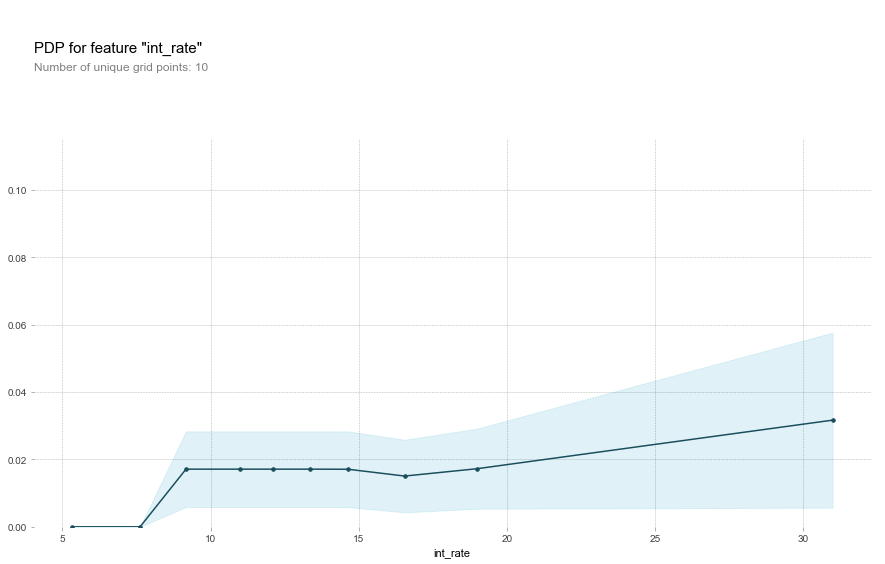

In [188]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature='int_rate'
pdp_isolated = pdp_isolate(model=gb, dataset=X_val, 
                           model_features=X_val.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

### Individual predictions

In [189]:
import numpy as np
y_pred = (y_pred_proba >= 0.5).astype(int)
confidence = np.abs(y_pred_proba - 0.5)
preds = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred, 
                      'y_pred_proba': y_pred_proba, 
                      'confidence': confidence})

preds.head(15)

,y_val,y_pred,y_pred_proba,confidence
1059693,1,0,0.080291,0.419709
46942,0,0,0.161666,0.338334
203400,0,0,0.121297,0.378703
906956,0,0,0.128559,0.371441
365434,0,0,0.164088,0.335912
874938,1,0,0.076909,0.423091
1015822,0,0,0.445819,0.054181
188032,0,0,0.140804,0.359196
555305,0,0,0.074374,0.425626
485781,0,0,0.183121,0.316879


In [50]:
# True positives, with high confidence
preds[(y_val==1) & (y_pred==1)].sort_values(by='confidence', ascending=False).head()


,y_val,y_pred,y_pred_proba,confidence
774821,1,1,0.837840,0.337840
749724,1,1,0.827743,0.327743
1197309,1,1,0.779569,0.279569
716699,1,1,0.773774,0.273774
612267,1,1,0.772970,0.272970


In [54]:
data_for_prediction = X_val.loc[774821] # fix this based on above
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)


In [55]:
# True negatives, with high confidence
preds[(y_val==0) & (y_pred==0)].sort_values(by='confidence', ascending=False).head()


,y_val,y_pred,y_pred_proba,confidence
783469,0,0,0.030286,0.469714
712079,0,0,0.030905,0.469095
24210,0,0,0.031045,0.468955
712283,0,0,0.032833,0.467167
1262526,0,0,0.032872,0.467128


In [56]:
data_for_prediction = X_val.loc[783469] # fix this based on above
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)


In [57]:
# False positives, with high (mistaken) confidence
preds[(y_val==0) & (y_pred==1)].sort_values(by='confidence', ascending=False).head()


,y_val,y_pred,y_pred_proba,confidence
239849,0,1,0.813402,0.313402
1198940,0,1,0.800202,0.300202
937315,0,1,0.798887,0.298887
59299,0,1,0.745837,0.245837
946887,0,1,0.733650,0.233650


In [70]:
data_for_prediction = X_val.loc[937315] # fix this based on above (or could set to index)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)



In [71]:
data_for_prediction

loan_amnt                              10000
funded_amnt                            10000
term                                       2
int_rate                               21.49
installment                            273.3
sub_grade                                4.5
emp_length                             False
home_ownership                             3
annual_inc                             50000
purpose                                    1
addr_state                                 7
dti                                    33.83
delinq_2yrs                                1
earliest_cr_line                        6687
inq_last_6mths                             2
mths_since_last_delinq                 False
mths_since_last_record                  True
open_acc                                   8
pub_rec                                    0
revol_bal                              57194
revol_util                              69.1
total_acc                                 16
initial_li

In [66]:
# False negatives, with high (mistaken) confidence
preds[(y_val==1) & (y_pred==0)].sort_values(by='confidence', ascending=False).head()


,y_val,y_pred,y_pred_proba,confidence
753941,1,0,0.037900,0.462100
1094938,1,0,0.039708,0.460292
655716,1,0,0.040121,0.459879
522282,1,0,0.040522,0.459478
756377,1,0,0.041886,0.458114


In [68]:
data_for_prediction = X_val.loc[753941]
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)



In [69]:
data_for_prediction

loan_amnt                               14000
funded_amnt                             14000
term                                        1
int_rate                                  7.9
installment                            438.07
sub_grade                                 1.4
emp_length                              False
home_ownership                              1
annual_inc                             103000
purpose                                     1
addr_state                                 11
dti                                      1.97
delinq_2yrs                                 0
earliest_cr_line                        10371
inq_last_6mths                              0
mths_since_last_delinq                   True
mths_since_last_record                   True
open_acc                                    4
pub_rec                                     0
revol_bal                                5452
revol_util                               51.4
total_acc                         

In [72]:
# Most uncertain predictions (least confidence)
preds.sort_values(by='confidence', ascending=True).head()

,y_val,y_pred,y_pred_proba,confidence
1176574,0,1,0.500068,0.000068
1010514,0,1,0.500089,0.000089
1038101,0,0,0.499882,0.000118
227594,1,1,0.500124,0.000124
225824,1,1,0.500160,0.000160


In [75]:
data_for_prediction = X_val.loc[1010514] # 376221 took from Ryan
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, 
                data_for_prediction)


In [76]:
data_for_prediction

loan_amnt                               15350
funded_amnt                             15350
term                                        2
int_rate                                19.22
installment                            400.05
sub_grade                                 4.4
emp_length                              False
home_ownership                              1
annual_inc                              46000
purpose                                     2
addr_state                                 30
dti                                     32.27
delinq_2yrs                                 0
earliest_cr_line                         7267
inq_last_6mths                              1
mths_since_last_delinq                   True
mths_since_last_record                   True
open_acc                                   11
pub_rec                                     0
revol_bal                               11738
revol_util                               64.9
total_acc                         

In [49]:
roc_auc_score(y_val, gb.predict_proba(X_val)[:,1])

0.7248786845100605

In [50]:
X_test = encoder.transform(X_test)

In [51]:
submission = sample_submission.copy()
submission['charged_off'] = gb.predict_proba(X_test)[:,1]
submission.to_csv('submission-006-gbc.csv', index=False)  # 0.71 on Public Leaderboard

In [202]:
submission.sample(11)

,id,charged_off
11933,1658982,0.058786
6584,2044408,0.091022
9383,2062610,0.385132
2681,1897932,0.077526
24980,1693875,0.134000
3432,1046997,0.119317
19537,2041759,0.076517
1766,1099669,0.130322
18764,1897015,0.102099
24709,1025673,0.385339


In [203]:
submission.shape

(26724, 2)